In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import re
df = pd.read_csv("/content/drive/MyDrive/rhombix tech task 1/coursea uncleaned datset.csv")  #Dataframe-- table-- rows x column
# Check dimensions
print("\nShape of dataframe:",df.shape)


Shape of dataframe: (50167, 7)


In [3]:
# Examine data types
print("\nData types of each column:")
print(df.info())


Data types of each column:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50167 entries, 0 to 50166
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   user_input      50167 non-null  object
 1   course_title    50167 non-null  object
 2   course_partner  50167 non-null  object
 3   course_review   43286 non-null  object
 4   skill_gain      40562 non-null  object
 5   course_rating   43286 non-null  object
 6   course_detail   50167 non-null  object
dtypes: object(7)
memory usage: 2.7+ MB
None


In [4]:
# Descriptive statistics for numerical columns
print("\nDescriptive statistics for numerical columns:")
print(df.describe())


Descriptive statistics for numerical columns:
          user_input       course_title            course_partner  \
count          50167              50167                     50167   
unique           121              10723                       323   
top     data_science  Google IT Support  Coursera Project Network   
freq            1000                 46                      4631   

         course_review                                     skill_gain  \
count            43286                                          40562   
unique            1024                                           5985   
top     (1.1K reviews)  Skills you'll gain: Leadership and Management   
freq               756                                            543   

       course_rating                       course_detail  
count          43286                               50167  
unique            30                                  43  
top             (4.7  Beginner Â· Course Â· 1 - 3 Months  
freq 

In [5]:
# Display first few rows
print("\nFirst 2 rows of the DataFrame:")
display(df.head())


First 2 rows of the DataFrame:


,user_input,course_title,course_partner,course_review,skill_gain,course_rating,course_detail
0,web_developement,Meta Front-End Developer,Meta,(18K reviews),"Skills you'll gain: HTML and CSS, Javascript, ...",(4.7,Beginner Â· Professional Certificate Â· 3 - 6 ...
1,web_developement,"HTML, CSS, and Javascript for Web Developers",Johns Hopkins University,(16K reviews),"Skills you'll gain: Front-End Web Development,...",(4.7,Mixed Â· Course Â· 1 - 3 Months
2,web_developement,Web Design for Everybody: Basics of Web Develo...,University of Michigan,(34K reviews),"Skills you'll gain: Front-End Web Development,...",(4.7,Beginner Â· Specialization Â· 3 - 6 Months
3,web_developement,"Python for Data Science, AI & Development",IBM,(36K reviews),"Skills you'll gain: Python Programming, Comput...",(4.6,Beginner Â· Course Â· 1 - 3 Months
4,web_developement,Introduction to Web Development,"University of California, Davis",(3.6K reviews),"Skills you'll gain: Computer Programming, Fron...",(4.7,Beginner Â· Course Â· 1 - 3 Months


In [6]:
#duplicates finding
num_duplicates = df.duplicated().sum()
print("\nNumber of duplicate rows:", num_duplicates)


Number of duplicate rows: 0


In [7]:
print("Number of rows with missing values\n", df.isnull().sum())

Number of rows with missing values
 user_input           0
course_title         0
course_partner       0
course_review     6881
skill_gain        9605
course_rating     6881
course_detail        0
dtype: int64


In [8]:
# 1. Remove unwanted characters and extra spaces
df_clean = df.copy()
for col in ['course_title', 'course_partner', 'course_detail']:
    df_clean[col] = df_clean[col].str.strip().str.replace("Â", "", regex=False)

In [9]:
# removing from rating column
df['course_rating'] = (
    df['course_rating']
    .str.replace('(', '', regex=False)
    .str.strip()
)
df['course_rating']

,course_rating
0,4.7
1,4.7
2,4.7
3,4.6
4,4.7
...,...
50162,4.7
50163,4.8
50164,4.7
50165,4.9


In [10]:
df['course_rating'] = pd.to_numeric(df['course_rating'], errors='coerce')
df['course_rating'].describe()
median_val = df['course_rating'].median()
df['course_rating'] = df['course_rating'].fillna(median_val)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50167 entries, 0 to 50166
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   user_input      50167 non-null  object 
 1   course_title    50167 non-null  object 
 2   course_partner  50167 non-null  object 
 3   course_review   43286 non-null  object 
 4   skill_gain      40562 non-null  object 
 5   course_rating   50167 non-null  float64
 6   course_detail   50167 non-null  object 
dtypes: float64(1), object(6)
memory usage: 2.7+ MB


In [12]:
df[['course_level', 'course_type', 'course_duration']] = (
    df['course_detail']
    .str.split("·", expand=True)
)


In [13]:
df['course_level'] = df['course_level'].str.strip()
df['course_type'] = df['course_type'].str.strip()
df['course_duration'] = df['course_duration'].str.strip()


In [14]:
#Some rows may not have these description so filling them with unknown
df[['course_level', 'course_type', 'course_duration']] = (
    df[['course_level', 'course_type', 'course_duration']].fillna("Unknown")
)


In [15]:
df.describe()

,course_rating
count,50167.000000
mean,4.639957
std,0.236459
min,1.400000
25%,4.600000
50%,4.700000
75%,4.800000
max,5.000000


In [16]:
#% of missing values in a column
missing_values = df.isnull().sum() # how many missing values in the column
missing_percentage = (missing_values / len(df)) * 100 # len----> no of rows

print("\nMissing Value Percentage:\n\n",missing_percentage)


Missing Value Percentage:

 user_input          0.000000
course_title        0.000000
course_partner      0.000000
course_review      13.716188
skill_gain         19.146052
course_rating       0.000000
course_detail       0.000000
course_level        0.000000
course_type         0.000000
course_duration     0.000000
dtype: float64


In [17]:
df['course_review']


,course_review
0,(18K reviews)
1,(16K reviews)
2,(34K reviews)
3,(36K reviews)
4,(3.6K reviews)
...,...
50162,(14K reviews)
50163,(2.1K reviews)
50164,(1.1K reviews)
50165,(756 reviews)


In [18]:
df['course_review']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50167 entries, 0 to 50166
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   user_input       50167 non-null  object 
 1   course_title     50167 non-null  object 
 2   course_partner   50167 non-null  object 
 3   course_review    43286 non-null  object 
 4   skill_gain       40562 non-null  object 
 5   course_rating    50167 non-null  float64
 6   course_detail    50167 non-null  object 
 7   course_level     50167 non-null  object 
 8   course_type      50167 non-null  object 
 9   course_duration  50167 non-null  object 
dtypes: float64(1), object(9)
memory usage: 3.8+ MB


In [19]:
df=df.drop(columns=['course_detail'])


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50167 entries, 0 to 50166
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   user_input       50167 non-null  object 
 1   course_title     50167 non-null  object 
 2   course_partner   50167 non-null  object 
 3   course_review    43286 non-null  object 
 4   skill_gain       40562 non-null  object 
 5   course_rating    50167 non-null  float64
 6   course_level     50167 non-null  object 
 7   course_type      50167 non-null  object 
 8   course_duration  50167 non-null  object 
dtypes: float64(1), object(8)
memory usage: 3.4+ MB


In [21]:
for col in ['course_level', 'course_type', 'course_duration']:
    df[col] = (
        df[col]
        .astype(str)
        .str.replace("Â", "", regex=False)    # remove stray Â
        .str.strip()                          # trim spaces at start/end
        .str.replace(r'\s+', ' ', regex=True)
    )
print(df[['course_level', 'course_type', 'course_duration']])

      course_level               course_type course_duration
0         Beginner  Professional Certificate    3 - 6 Months
1            Mixed                    Course    1 - 3 Months
2         Beginner            Specialization    3 - 6 Months
3         Beginner                    Course    1 - 3 Months
4         Beginner                    Course    1 - 3 Months
...            ...                       ...             ...
50162     Beginner                    Course    1 - 3 Months
50163     Beginner                    Course     1 - 4 Weeks
50164     Beginner                    Course    1 - 3 Months
50165     Beginner                    Course    1 - 3 Months
50166        Mixed                    Course     1 - 4 Weeks

[50167 rows x 3 columns]


In [22]:
df[['course_level','course_type','course_duration']].isna().sum() #checking for null values in specific columns

,0
course_level,0
course_type,0
course_duration,0


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50167 entries, 0 to 50166
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   user_input       50167 non-null  object 
 1   course_title     50167 non-null  object 
 2   course_partner   50167 non-null  object 
 3   course_review    43286 non-null  object 
 4   skill_gain       40562 non-null  object 
 5   course_rating    50167 non-null  float64
 6   course_level     50167 non-null  object 
 7   course_type      50167 non-null  object 
 8   course_duration  50167 non-null  object 
dtypes: float64(1), object(8)
memory usage: 3.4+ MB


In [24]:
s = df['course_review'].astype(str)

# Handling irrelevant characters
s = (s.str.replace('reviews', '', case=False, regex=False)
       .str.replace('(', '', regex=False)
       .str.replace(')', '', regex=False)
       .str.replace(',', '', regex=False)
       .str.replace('+', '', regex=False)
       .str.strip())

df['course_review'] = df['course_review'].fillna(0)

# Displaying result
print(df['course_review'].dtype)
print(df['course_review'])
print(df['course_review'].isna().sum())



object
0         (18K reviews)
1         (16K reviews)
2         (34K reviews)
3         (36K reviews)
4        (3.6K reviews)
              ...      
50162     (14K reviews)
50163    (2.1K reviews)
50164    (1.1K reviews)
50165     (756 reviews)
50166     (34K reviews)
Name: course_review, Length: 50167, dtype: object
0


In [25]:
#df.info()
df['skill_gain']

,skill_gain
0,"Skills you'll gain: HTML and CSS, Javascript, ..."
1,"Skills you'll gain: Front-End Web Development,..."
2,"Skills you'll gain: Front-End Web Development,..."
3,"Skills you'll gain: Python Programming, Comput..."
4,"Skills you'll gain: Computer Programming, Fron..."
...,...
50162,"Skills you'll gain: Computer Programming, Data..."
50163,NaN
50164,"Skills you'll gain: Leadership and Management,..."
50165,"Skills you'll gain: Communication, Design and ..."


In [26]:
#cleaning "skills gain" column now
df['skill_gain'] = (
    df['skill_gain']
    .astype(str)
    .str.replace("Skills you'll gain:", "", regex=False)
    .str.strip()
)


In [27]:
df['skill_gain'] = df['skill_gain'].replace(["nan", "unknown"], np.nan)


In [28]:
df['skill_list'] = df['skill_gain'].dropna().apply(
    lambda x: [s.strip() for s in x.split(",")]
)


In [29]:
skills_exploded = df.explode('skill_list')
df['skill_list'].isna().sum()
df['skill_list'].value_counts()

,count
skill_list,
[Leadership and Management],543
[Communication],377
[Critical Thinking],335
[Computer Programming],247
[Planning],230
...,...
"[Cloud Computing, DevOps, Google Cloud Platform]",1
"[Applied Machine Learning, Machine Learning]",1
"[Exploratory Data Analysis, Machine Learning]",1


In [30]:
from collections import Counter
#Explode the list so each skill is in its own row
skills_exploded = df.explode('skill_list')

#Drop missing values
skills_exploded = skills_exploded.dropna(subset=['skill_list'])

#Counting skill frequencies
skill_counts = skills_exploded['skill_list'].value_counts().head(20)

#Result
print(skill_counts)


skill_list
Leadership and Management    13786
Communication                 9073
Strategy                      8480
Data Analysis                 7708
Strategy and Operations       7277
Computer Programming          6554
Marketing                     5940
Business Analysis             5662
Critical Thinking             5598
Problem Solving               5085
Planning                      4364
Python Programming            4208
Entrepreneurship              4098
Decision Making               3975
Data Management               3826
Cloud Computing               3818
Finance                       3601
Machine Learning              3480
Algorithms                    3068
Databases                     3034
Name: count, dtype: int64


In [31]:
df['skill_list'].isnull().sum()

np.int64(9605)

In [32]:
def normalize_skill(skill):
    if pd.isna(skill):
        return np.nan
    s = skill.strip().lower()
    # Fix common variations
    s = s.replace("javascript", "JavaScript")
    s = s.replace("html5", "HTML")
    s = s.replace("css3", "CSS")
    s = s.replace("sql database", "SQL")
    s = s.replace("python programming", "Python")
    s = s.replace("machine learning (ml)", "Machine Learning")
    # Capitalize first letter of each word for readability
    return " ".join([word.capitalize() for word in s.split()])


In [33]:
df['skill_list'] = df['skill_list'].dropna().apply(
    lambda skills: [normalize_skill(s) for s in skills]
)


In [34]:
skills_exploded = df.explode('skill_list')
skills_exploded = skills_exploded.dropna(subset=['skill_list'])

skill_counts = skills_exploded['skill_list'].value_counts().head(60)
print(skill_counts)


skill_list
Leadership And Management      13786
Communication                   9073
Strategy                        8480
Data Analysis                   7708
Strategy And Operations         7277
Computer Programming            6554
Marketing                       5940
Business Analysis               5662
Critical Thinking               5598
Problem Solving                 5085
Planning                        4364
Python                          4208
Entrepreneurship                4098
Decision Making                 3975
Data Management                 3826
Cloud Computing                 3818
Finance                         3601
Machine Learning                3480
Algorithms                      3068
Databases                       3034
Probability & Statistics        3020
Organizational Development      2882
Design And Product              2795
Data Visualization              2753
Collaboration                   2747
Software Engineering            2737
Project Management         

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50167 entries, 0 to 50166
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   user_input       50167 non-null  object 
 1   course_title     50167 non-null  object 
 2   course_partner   50167 non-null  object 
 3   course_review    50167 non-null  object 
 4   skill_gain       40562 non-null  object 
 5   course_rating    50167 non-null  float64
 6   course_level     50167 non-null  object 
 7   course_type      50167 non-null  object 
 8   course_duration  50167 non-null  object 
 9   skill_list       40562 non-null  object 
dtypes: float64(1), object(9)
memory usage: 3.8+ MB


In [36]:
df['skill_gain'].isna().sum()   #  missing values


np.int64(9605)

In [37]:
df['skill_gain'] = df['skill_gain'].fillna("No Skills Provided")


In [38]:
df['skill_list'] = df['skill_list'].apply(lambda x: x if isinstance(x, list) else [])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50167 entries, 0 to 50166
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   user_input       50167 non-null  object 
 1   course_title     50167 non-null  object 
 2   course_partner   50167 non-null  object 
 3   course_review    50167 non-null  object 
 4   skill_gain       50167 non-null  object 
 5   course_rating    50167 non-null  float64
 6   course_level     50167 non-null  object 
 7   course_type      50167 non-null  object 
 8   course_duration  50167 non-null  object 
 9   skill_list       50167 non-null  object 
dtypes: float64(1), object(9)
memory usage: 3.8+ MB


In [39]:
df=df.drop(columns=['skill_gain'])

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50167 entries, 0 to 50166
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   user_input       50167 non-null  object 
 1   course_title     50167 non-null  object 
 2   course_partner   50167 non-null  object 
 3   course_review    50167 non-null  object 
 4   course_rating    50167 non-null  float64
 5   course_level     50167 non-null  object 
 6   course_type      50167 non-null  object 
 7   course_duration  50167 non-null  object 
 8   skill_list       50167 non-null  object 
dtypes: float64(1), object(8)
memory usage: 3.4+ MB


In [41]:
display(df.head())

,user_input,course_title,course_partner,course_review,course_rating,course_level,course_type,course_duration,skill_list
0,web_developement,Meta Front-End Developer,Meta,(18K reviews),4.7,Beginner,Professional Certificate,3 - 6 Months,"[Html And Css, Javascript, Front-end Web Devel..."
1,web_developement,"HTML, CSS, and Javascript for Web Developers",Johns Hopkins University,(16K reviews),4.7,Mixed,Course,1 - 3 Months,"[Front-end Web Development, Html And Css, Java..."
2,web_developement,Web Design for Everybody: Basics of Web Develo...,University of Michigan,(34K reviews),4.7,Beginner,Specialization,3 - 6 Months,"[Front-end Web Development, Html And Css, Web ..."
3,web_developement,"Python for Data Science, AI & Development",IBM,(36K reviews),4.6,Beginner,Course,1 - 3 Months,"[Python, Computer Programming, Data Analysis]"
4,web_developement,Introduction to Web Development,"University of California, Davis",(3.6K reviews),4.7,Beginner,Course,1 - 3 Months,"[Computer Programming, Front-end Web Developme..."


In [42]:
df.describe()

,course_rating
count,50167.000000
mean,4.639957
std,0.236459
min,1.400000
25%,4.600000
50%,4.700000
75%,4.800000
max,5.000000


In [43]:
cat_cols=df.select_dtypes(include=['object']).columns
num_cols = df.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['user_input', 'course_title', 'course_partner', 'course_review',
       'course_level', 'course_type', 'course_duration', 'skill_list'],
      dtype='object')
Numerical Variables:
['course_rating']


In [44]:
bins = [0, 3.5, 4.0, 4.5, 5.0]
labels = ['Low (<3.5)', 'Average (3.5–4.0)', 'Good (4.1–4.5)', 'Excellent (4.6–5.0)']

df['rating_category'] = pd.cut(df['course_rating'], bins=bins, labels=labels, include_lowest=True)

print(df['rating_category'].value_counts())



rating_category
Excellent (4.6–5.0)    39980
Good (4.1–4.5)          8757
Average (3.5–4.0)       1032
Low (<3.5)               398
Name: count, dtype: int64


In [45]:
# Check for missing values
print(df.isnull().sum())


# Check for outliers (using IQR method for numerical continous features)
numerical_features = ['course_rating']
for col in numerical_features:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"\nNumber of outliers in {col}: {len(outliers)}")
    # Display a few outliers
    display(outliers[[col]].head())

user_input         0
course_title       0
course_partner     0
course_review      0
course_rating      0
course_level       0
course_type        0
course_duration    0
skill_list         0
rating_category    0
dtype: int64

Number of outliers in course_rating: 2623


,course_rating
7,4.1
37,3.3
43,4.1
71,4.2
73,3.9


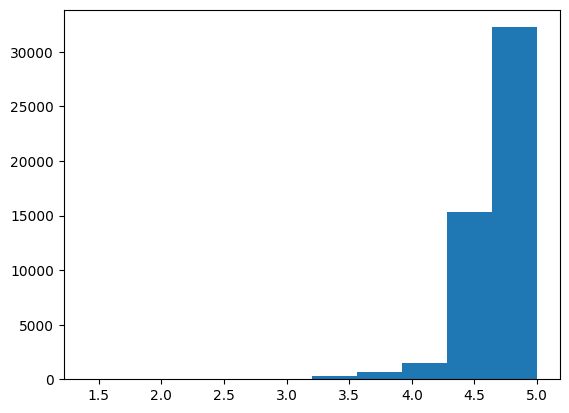

In [46]:
import matplotlib.pyplot as plt
plt.hist(df['course_rating'])
plt.show()

**Reasoning**I have identified outliers.  The next step is to handle them.


In [47]:
# Handling missing values in 'depth' by imputation with the median
df['course_rating'] = df['course_rating'].fillna(df['course_rating'].median())

# No duplicates found, so no action needed

# Handling outliers:  Instead of removing them, I will cap them at the upper and lower bounds.
for col in numerical_features:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

**Reasoning:**The data cleaning is done.  The next step is to perform univariate analysis.

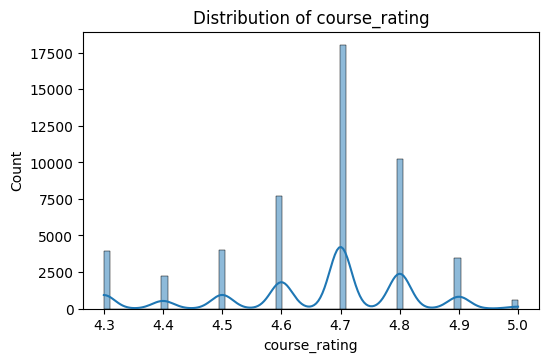

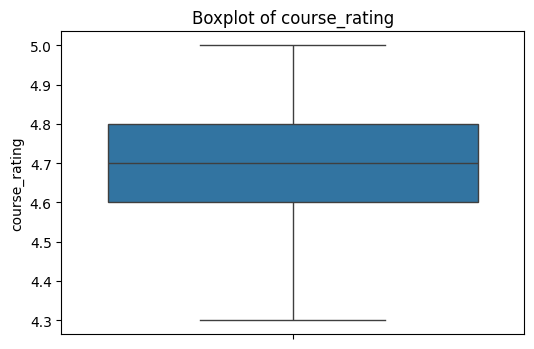

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

# Univariate Analysis: Histograms for numerical features
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_features):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# Univariate Analysis: Boxplots for numerical features to visualize the distribution of the data.
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_features):
    plt.subplot(3, 3, i+1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()



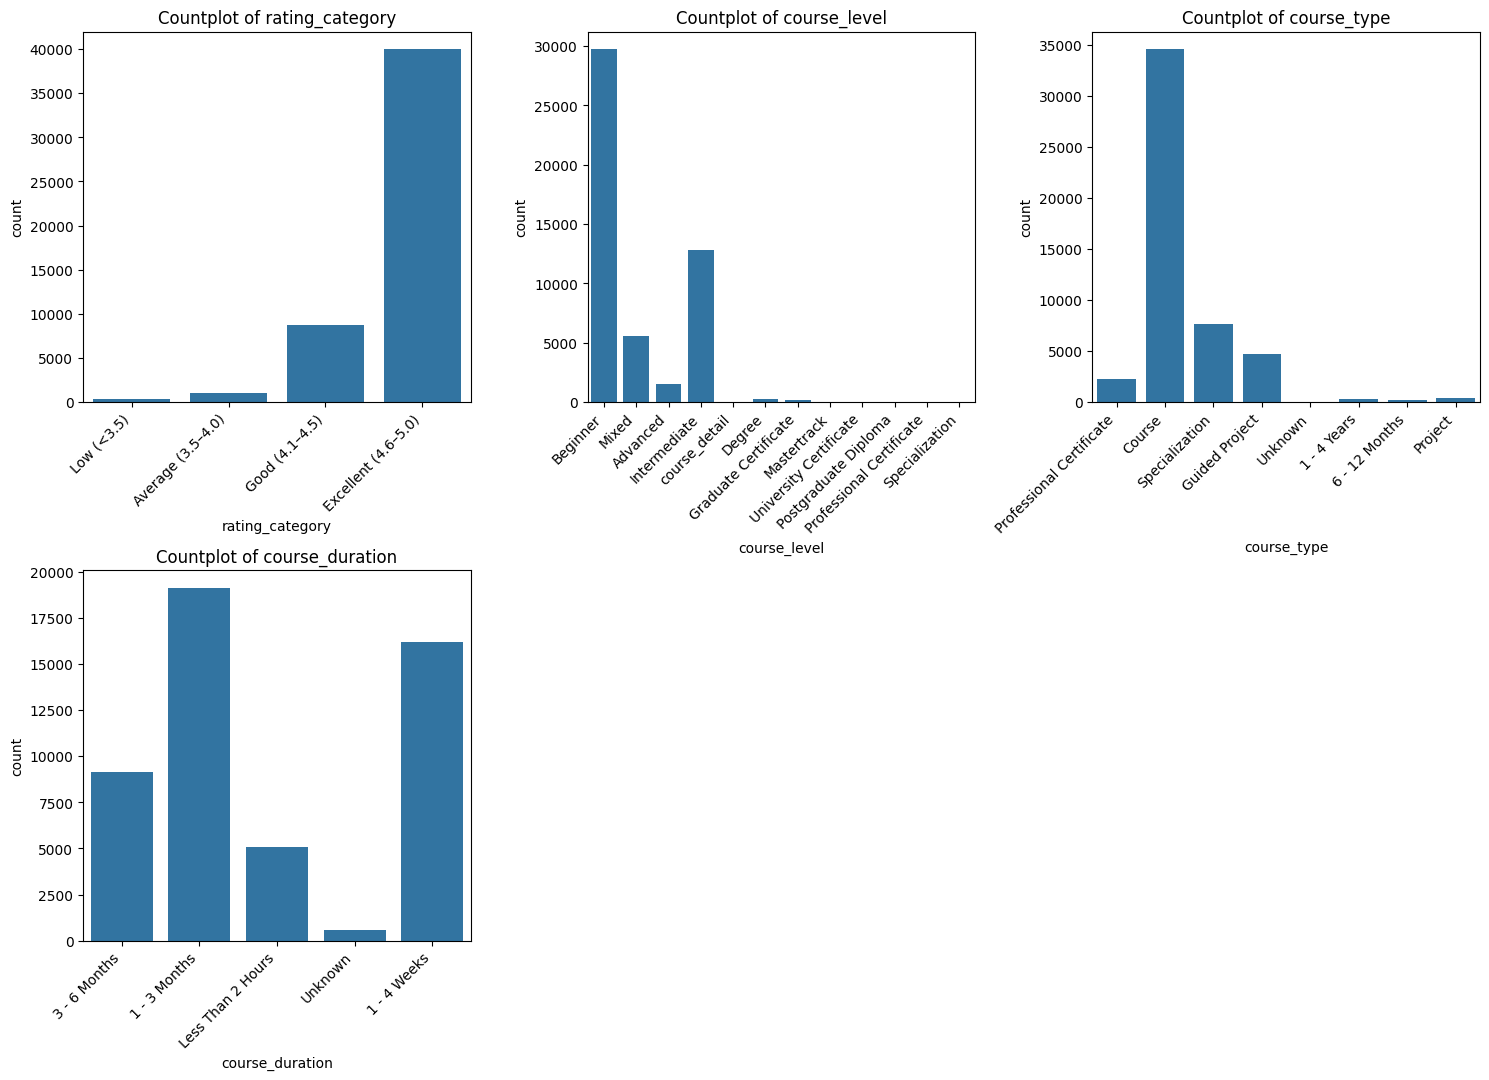

In [49]:
# Univariate Analysis: Countplots for categorical features
plt.figure(figsize=(15, 15)) # Increased figure size
categorical_cols = ['rating_category',
       'course_level', 'course_type', 'course_duration']
for i, col in enumerate(categorical_cols):

  # Adjusted subplot grid to 3 rows and 3 columns
  plt.subplot(3, 3, i+1)
  sns.countplot(x=df[col])
  plt.xticks(rotation=45, ha='right') # Adjusted rotation for better readability
  plt.title(f'Countplot of {col}')
plt.tight_layout()
plt.show()

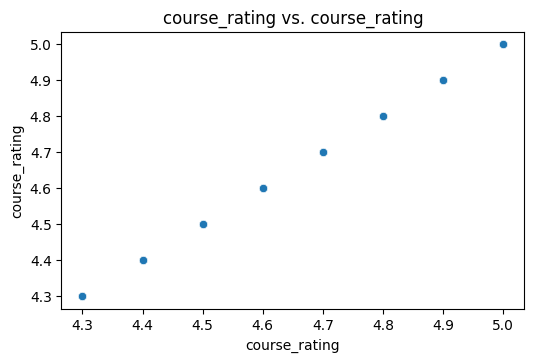

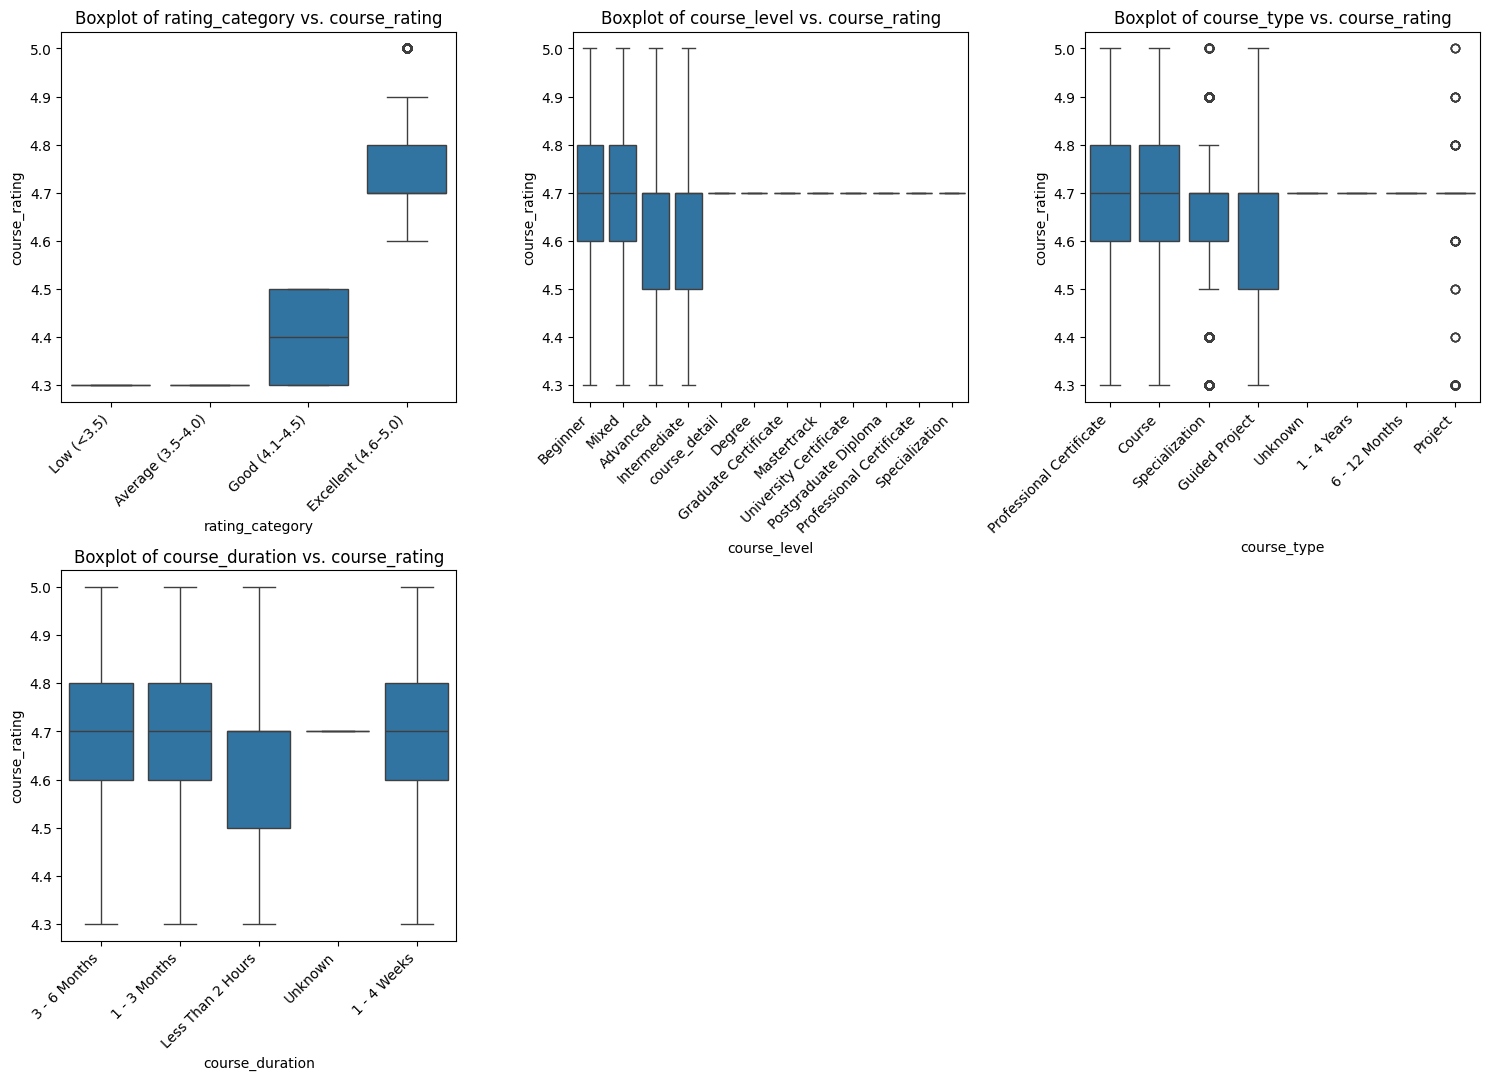

In [50]:
# Bivariate Analysis
plt.figure(figsize=(15, 10))

# Scatter plots for numerical features vs. price
for i, col in enumerate(numerical_features):
    plt.subplot(3, 3, i + 1)
    sns.scatterplot(x=df[col], y=df['course_rating'])
    plt.title(f'{col} vs. course_rating')
plt.tight_layout()
plt.show()


# Boxplots for categorical features vs. price
plt.figure(figsize=(15, 15)) # Increased figure size
categorical_cols = ['rating_category',
       'course_level', 'course_type', 'course_duration'] # Added more categorical columns
for i, col in enumerate(categorical_cols):
    plt.subplot(3, 3, i + 1) # Adjusted subplot grid to 3 rows and 3 columns
    sns.boxplot(x=df[col], y=df['course_rating'])
    plt.xticks(rotation=45, ha='right') # Adjusted rotation for better readability
    plt.title(f'Boxplot of {col} vs. course_rating')

plt.tight_layout()
plt.show()

<Axes: xlabel='course_duration', ylabel='course_rating'>

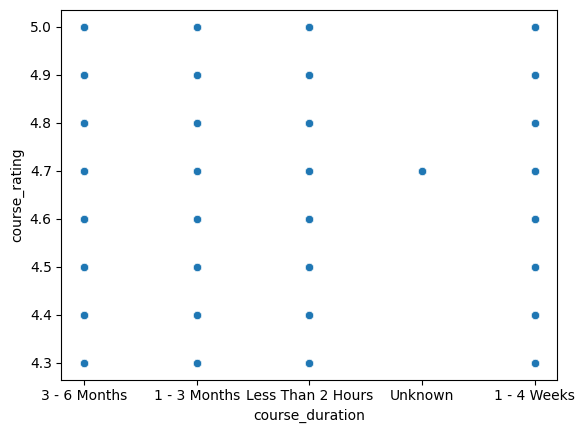

In [51]:

sns.scatterplot(data=df, x='course_duration', y='course_rating')


<Axes: xlabel='course_type', ylabel='course_rating'>

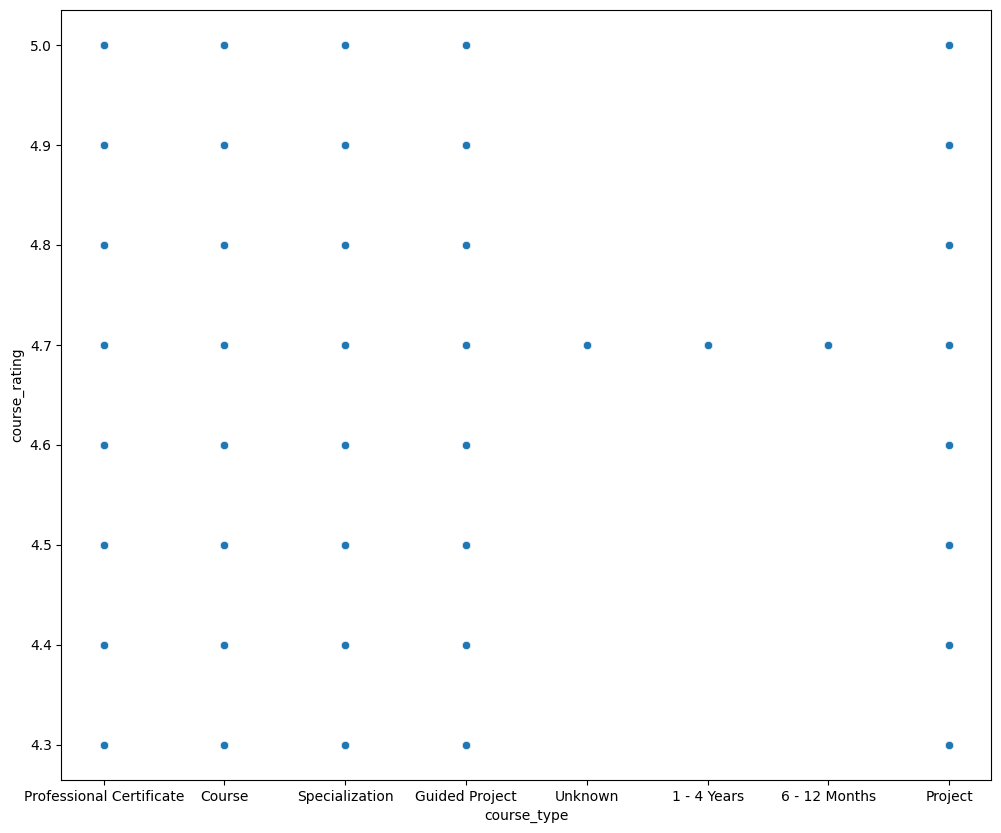

In [52]:
plt.figure(figsize=(12,10))
sns.scatterplot(data=df, x='course_type', y='course_rating')

<Axes: xlabel='rating_category', ylabel='course_rating'>

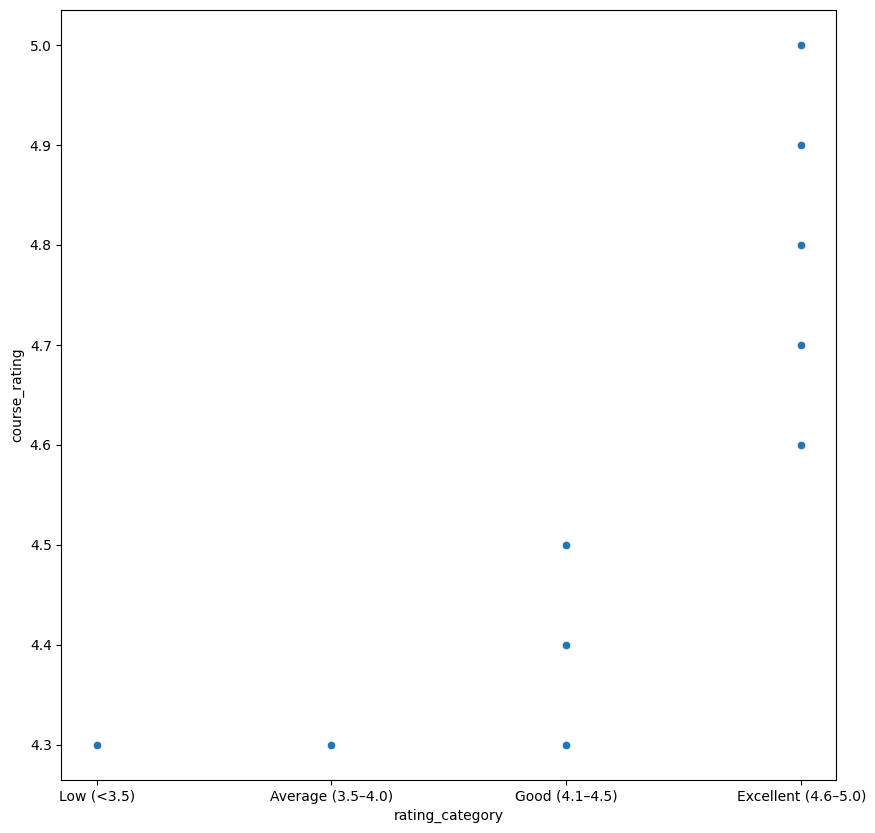

In [53]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=df, x='rating_category', y='course_rating')

<Axes: xlabel='course_level', ylabel='course_rating'>

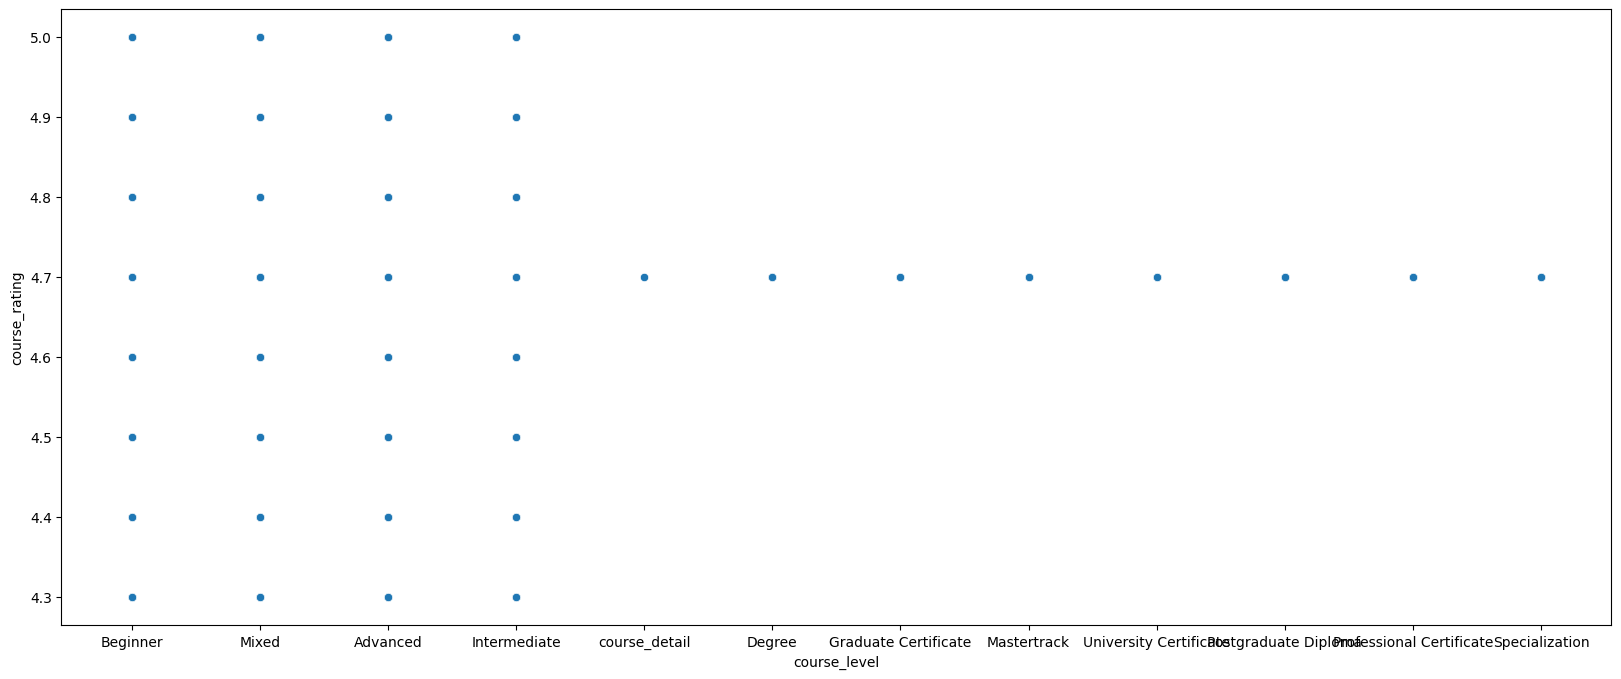

In [54]:
plt.figure(figsize=(20,8))
sns.scatterplot(data=df, x='course_level', y='course_rating')

/tmp/ipython-input-3539096443.py:3: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heatmap_data = df.pivot_table(values='course_rating', index='rating_category', aggfunc=np.mean)
/tmp/ipython-input-3539096443.py:3: FutureWarning: The provided callable <function mean at 0x7a37bbb70900> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  heatmap_data = df.pivot_table(values='course_rating', index='rating_category', aggfunc=np.mean)


<Figure size 1000x600 with 0 Axes>

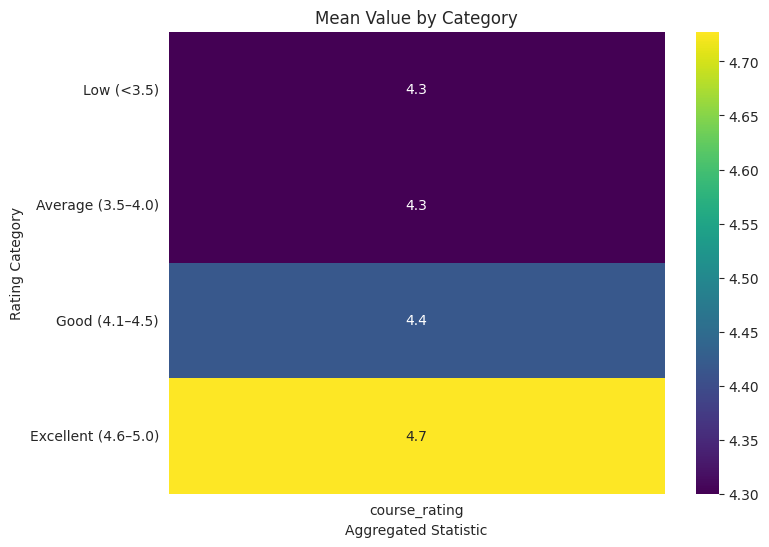

In [55]:
plt.figure(figsize=(10,6))
sns.set_style("whitegrid")
heatmap_data = df.pivot_table(values='course_rating', index='rating_category', aggfunc=np.mean)
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, cmap='viridis', fmt=".1f")
plt.title('Mean Value by Category')
plt.xlabel('Aggregated Statistic') # Since there's only one numerical column, this might be a single column.
plt.ylabel('Rating Category')
plt.show()

/tmp/ipython-input-2682169962.py:3: FutureWarning: The provided callable <function mean at 0x7a37bbb70900> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  heatmap_data = df.pivot_table(values='course_rating', index='course_level', aggfunc=np.mean)


<Figure size 1000x600 with 0 Axes>

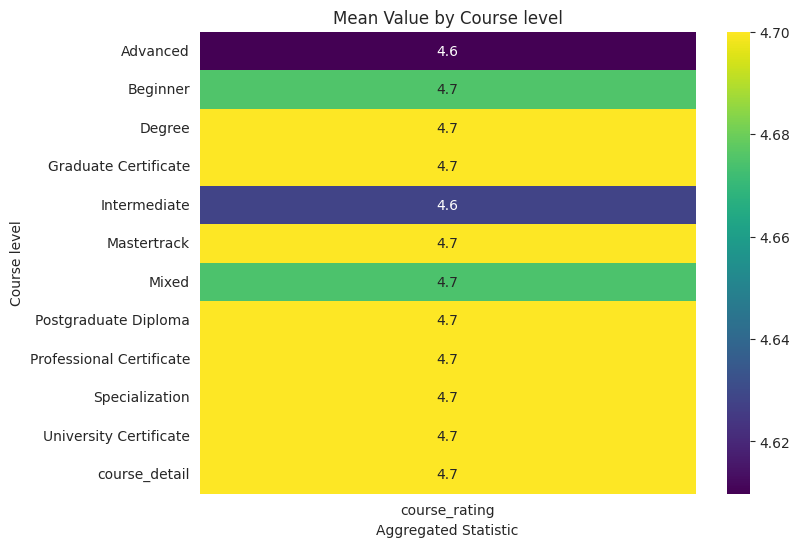

In [56]:
plt.figure(figsize=(10,6))
sns.set_style("whitegrid")
heatmap_data = df.pivot_table(values='course_rating', index='course_level', aggfunc=np.mean)
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, cmap='viridis', fmt=".1f")
plt.title('Mean Value by Course level')
plt.xlabel('Aggregated Statistic') # Since there's only one numerical column, this might be a single column.
plt.ylabel('Course level')
plt.show()

/tmp/ipython-input-2074422978.py:3: FutureWarning: The provided callable <function mean at 0x7a37bbb70900> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  heatmap_data = df.pivot_table(values='course_rating', index='course_duration', aggfunc=np.mean)


<Figure size 1000x600 with 0 Axes>

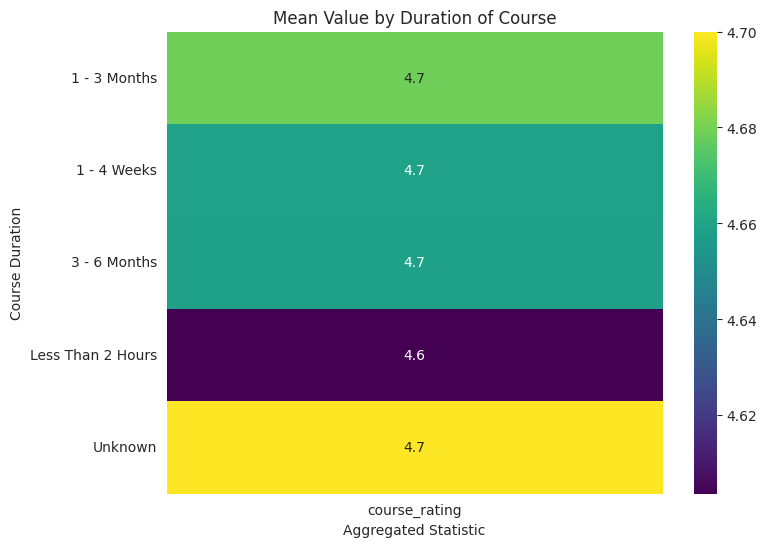

In [57]:
plt.figure(figsize=(10,6))
sns.set_style("whitegrid")
heatmap_data = df.pivot_table(values='course_rating', index='course_duration', aggfunc=np.mean)
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, cmap='viridis', fmt=".1f")
plt.title('Mean Value by Duration of Course')
plt.xlabel('Aggregated Statistic') # Since there's only one numerical column, this might be a single column.
plt.ylabel('Course Duration')
plt.show()

**Summary**

The dataset was cleaned by handling missing values, removing duplicates, and converting text fields (e.g., reviews, ratings, skills) into structured numeric or categorical features. Outlier analysis showed that most courses cluster at very high ratings (4.6–4.8), with only a few low-rated outliers, while review counts are heavily skewed with a small fraction of courses attracting massive enrollments. Beginner-level and longer-duration courses (1–3 months) generally received the strongest ratings, whereas advanced courses and ultra-short guided projects scored slightly lower, though still above 4.5 on average.

The analysis highlights consistently high learner satisfaction across Coursera offerings, with course type, level, and duration having only modest influence on ratings. Key insights suggest that short projects may need content improvements to boost perceived value, while beginner and professional certificate programs are performing exceptionally well. The dataset is now fully prepared for modeling or dashboarding, with categorical features encoded and numerical variables standardized, making it suitable for predictive tasks or further business intelligence use. Overall, these findings reinforce that Coursera’s portfolio delivers high quality across formats, with only modest differences by level, type, or duration.
